Завдання 2. Визначення важливих ознак

1.Завантажити набір даних.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

2.Розділити дані на тренувальний та тестовий набори.

In [62]:
X = data.data
y = data.target
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

3.Застосувати випадковий ліс для визначення важливих ознак.

In [63]:
svm_cl = SVC(kernel='linear')
svm_cl.fit(X_train, y_train)

rf_cl = RandomForestClassifier(random_state=42)
rf_cl.fit(X_train, y_train)

feature_import_rf = rf_cl.feature_importances_ #rf importances
rf_ind = np.argsort(feature_import_rf)[::-1]
svm_coeffs = np.abs(svm_cl.coef_[0])  #svm importances
svm_ind = np.argsort(svm_coeffs)[::-1]

4.Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

Feature importance's Random Forest:
1. worst area:0.1539
2. worst concave points:0.1447
3. mean concave points:0.1062
4. worst radius:0.0780
5. mean concavity:0.0680
6. worst perimeter:0.0671
7. mean perimeter:0.0533
8. mean radius:0.0487
9. mean area:0.0476
10. worst concavity:0.0318


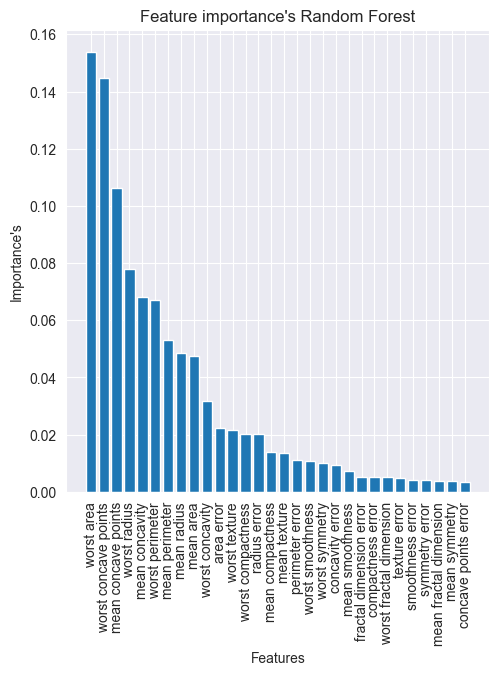

In [64]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Feature importance's Random Forest")
plt.bar(range(X_train.shape[1]), feature_import_rf[rf_ind], align="center")
plt.xticks(range(X_train.shape[1]),data.feature_names[rf_ind], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance's")
print("Feature importance's Random Forest:")
for i in range(10):
    print(f"{i + 1}. {data.feature_names[rf_ind[i]]}:{feature_import_rf[rf_ind[i]]:.4f}")

Графік та ознаки SVM

Feature importance's SVM:
1. worst concavity:1.7249
2. texture error:1.6050
3. mean radius:1.2550
4. worst symmetry:1.1955
5. worst compactness:0.9003
6. mean concavity:0.6751
7. worst concave points:0.6310
8. worst smoothness:0.4670
9. mean concave points:0.3992
10. mean symmetry:0.3429


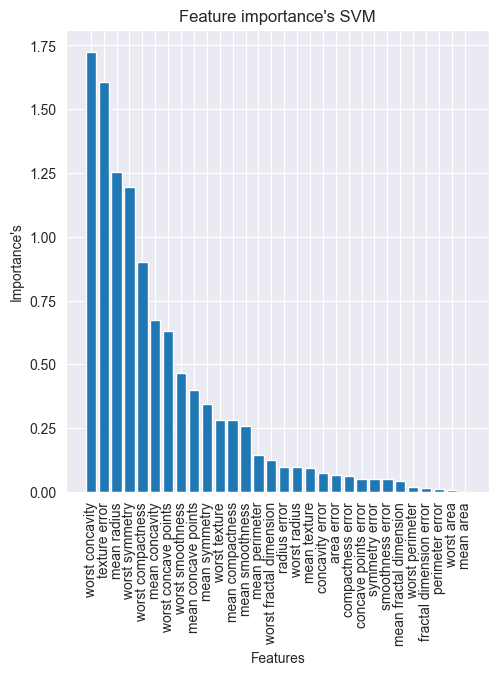

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
plt.title("Feature importance's SVM")
plt.bar(range(X_train.shape[1]), svm_coeffs[svm_ind], align="center")
plt.xticks(range(X_train.shape[1]),data.feature_names[svm_ind], rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance's")
print("Feature importance's SVM:")
for i in range(10):
    print(f"{i + 1}. {data.feature_names[svm_ind[i]]}:{svm_coeffs[svm_ind[i]]:.4f}")

6.Обчислити точність для двох алгоритмів і порівняти результати

In [66]:
svm_pred = svm_cl.predict(X_test)
rf_pred = rf_cl.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
rf_acc = accuracy_score (y_test, rf_pred)
print(f"Random forest acc: {rf_acc:.4f}")
print(f"SVM acc: {svm_acc:.4f}")
if svm_acc > rf_acc:
    print("SVM more accurate than forest")
elif svm_acc < rf_acc:
    print("RND forest best acc")
else:
    print("Same acc")

Random forest acc: 0.9649
SVM acc: 0.9561
RND forest best acc


Висновок: В даній лабораторній роботі були розглянути два алгоритма для машинного навчання SVM та Random Forest, які використовуються для вирішення завдань класифікації. SVM є потужним алгоритмом, який може забезпечити високу точність класифікації, однак він дуже чутливий до "шуму даних" і повільний для навчання з великими наборами даних.В той час як рандом форест більш стійкий до шуму даних та має велику швидкість обробки великого набору даних, але має меншу точність.Також обидва алгоритми проявляють свою сильні сторони в певних завданнях.